In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xg
from xgboost import plot_importance
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

from collections import OrderedDict

%matplotlib inline

df = pd.read_excel("Cdataset_bangkok.xlsx")
full_df = pd.read_excel("Cdataset_bangkok.xlsx")

# EDA

In [24]:
df

,Land size,Usable Area,Bedroom,Bathroom,Garage,Near Shopping Mall,Near Train Station,House type,Number of Populations,Zone,Price
0,64.0,256.00,4,4,1,1,1,1,21324,Inner_Bangkok,8000000
1,25.3,255.75,3,3,1,1,1,1,21324,Inner_Bangkok,24000000
2,70.0,175.00,3,2,1,1,1,1,21324,Inner_Bangkok,59500000
3,40.0,42.00,2,2,1,1,1,1,38955,Thonburi,3299000
4,133.0,40.00,3,2,1,1,1,1,38955,Thonburi,3990000
...,...,...,...,...,...,...,...,...,...,...,...
527,116.0,230.00,3,5,1,1,0,1,472617,Outer_Bangkok,8700000
528,86.6,178.00,4,3,1,1,0,1,472617,Outer_Bangkok,8900000
529,116.7,175.00,6,5,1,1,0,1,472617,Outer_Bangkok,9900000
530,25.0,126.00,1,1,1,1,1,1,472617,Outer_Bangkok,16000000


In [25]:
df.head()

,Land size,Usable Area,Bedroom,Bathroom,Garage,Near Shopping Mall,Near Train Station,House type,Number of Populations,Zone,Price
0,64.0,256.00,4,4,1,1,1,1,21324,Inner_Bangkok,8000000
1,25.3,255.75,3,3,1,1,1,1,21324,Inner_Bangkok,24000000
2,70.0,175.00,3,2,1,1,1,1,21324,Inner_Bangkok,59500000
3,40.0,42.00,2,2,1,1,1,1,38955,Thonburi,3299000
4,133.0,40.00,3,2,1,1,1,1,38955,Thonburi,3990000


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 532 entries, 0 to 531
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Land size              532 non-null    float64
 1   Usable Area            532 non-null    float64
 2   Bedroom                532 non-null    int64  
 3   Bathroom               532 non-null    int64  
 4   Garage                 532 non-null    int64  
 5   Near Shopping Mall     532 non-null    int64  
 6   Near Train Station     532 non-null    int64  
 7   House type             532 non-null    int64  
 8   Number of Populations  532 non-null    int64  
 9   Zone                   532 non-null    object 
 10  Price                  532 non-null    int64  
dtypes: float64(2), int64(8), object(1)
memory usage: 45.8+ KB


In [27]:
df.describe()

,Land size,Usable Area,Bedroom,Bathroom,Garage,Near Shopping Mall,Near Train Station,House type,Number of Populations,Price
count,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,5.320000e+02
mean,99.363383,193.655451,3.541353,3.199248,0.945489,0.652256,0.370301,1.077068,183556.851504,1.492610e+07
std,96.804967,140.208874,0.970458,1.235751,0.227237,0.476703,0.483340,0.266950,138918.457280,1.654016e+07
min,3.000000,10.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,21324.000000,5.000000e+05
25%,50.000000,109.000000,3.000000,2.000000,1.000000,0.000000,0.000000,1.000000,90148.000000,4.700000e+06
50%,67.000000,155.000000,3.000000,3.000000,1.000000,1.000000,0.000000,1.000000,120394.000000,8.500000e+06
75%,116.175000,220.500000,4.000000,4.000000,1.000000,1.000000,1.000000,1.000000,182235.000000,1.800000e+07
max,650.000000,800.000000,8.000000,8.000000,1.000000,1.000000,1.000000,2.000000,525261.000000,1.000000e+08


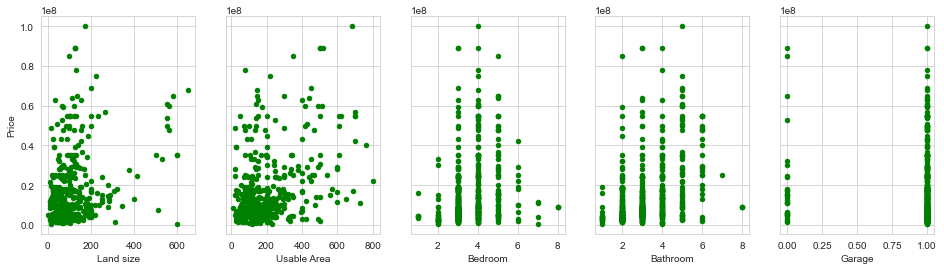

In [28]:
fig, axes = plt.subplots(ncols=5, figsize=(16, 4))
axes = np.ravel(axes)
col_name = ['Land size','Usable Area','Bedroom','Bathroom','Garage']
for i, c in zip(range(5), col_name):
    df.plot.scatter(ax=axes[i], x=c, y='Price', sharey=True, colorbar=False, c='g')

<AxesSubplot:>

<Figure size 3600x2160 with 0 Axes>

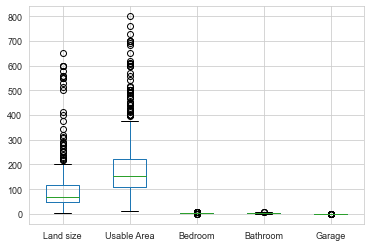

In [29]:
col_name = ['Land size','Usable Area','Bedroom','Bathroom','Garage']
sns.set_style('whitegrid')
plt.figure(figsize=(50,30))
plt.rcParams.update({"font.size":9})
df[col_name].plot.box()

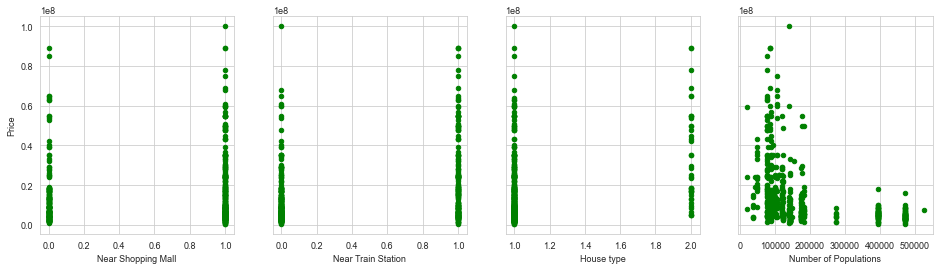

In [30]:
fig1, axes1 = plt.subplots(ncols=4, figsize=(16, 4))
axes1 = np.ravel(axes1)
col_name1 = ['Near Shopping Mall', 'Near Train Station','House type','Number of Populations']
for j, c1 in zip(range(5), col_name1):
    df.plot.scatter(ax=axes1[j], x=c1, y='Price', sharey=True, colorbar=False, c='g')

<AxesSubplot:>

<Figure size 3600x2160 with 0 Axes>

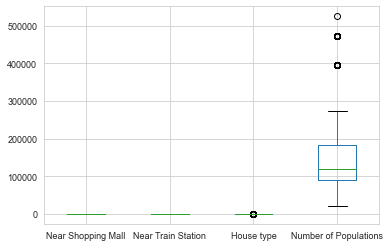

In [31]:
col_name1 = ['Near Shopping Mall', 'Near Train Station','House type','Number of Populations']
sns.set_style('whitegrid')
plt.figure(figsize=(50,30))
plt.rcParams.update({"font.size":9})

df[col_name1].plot.box()

C:\Users\Teerakom\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Price Distribution')

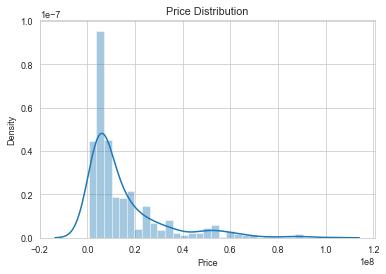

In [32]:
sns.distplot(full_df['Price'])
plt.title('Price Distribution')

C:\Users\Teerakom\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([0, 1, 2, 3]),
 [Text(0, 0, 'Inner_Bangkok'),
  Text(1, 0, 'Thonburi'),
  Text(2, 0, 'Outer_Bangkok'),
  Text(3, 0, 'Central_Bangkok')])

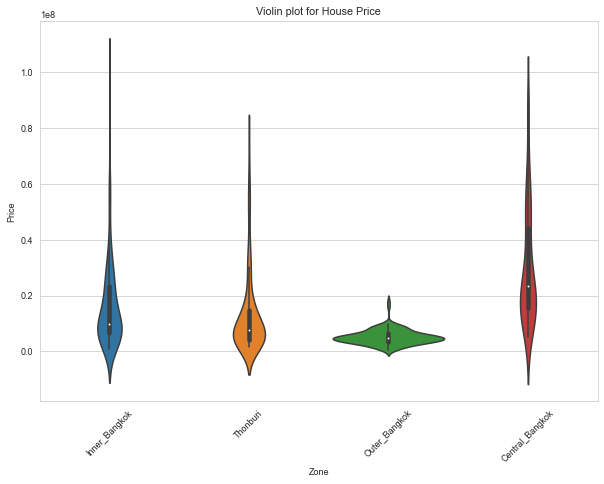

In [33]:
plt.figure(figsize=(10,7), facecolor='w', edgecolor='k')
sns.violinplot(full_df['Zone'], full_df['Price'])
plt.title("Violin plot for House Price")
plt.xticks(rotation=45)

<AxesSubplot:>

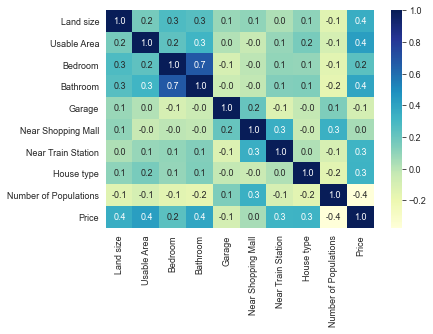

In [34]:
sns.heatmap(df.corr(),annot=True, cmap='YlGnBu', fmt='.1f')

# Nominal to Numeric

In [35]:
df = pd.concat([df, pd.get_dummies(df["Zone"])], axis=1)
df = df.drop(["Zone"], 1)

df = df.dropna()
df.head()

,Land size,Usable Area,Bedroom,Bathroom,Garage,Near Shopping Mall,Near Train Station,House type,Number of Populations,Price,Central_Bangkok,Inner_Bangkok,Outer_Bangkok,Thonburi
0,64.0,256.00,4,4,1,1,1,1,21324,8000000,0,1,0,0
1,25.3,255.75,3,3,1,1,1,1,21324,24000000,0,1,0,0
2,70.0,175.00,3,2,1,1,1,1,21324,59500000,0,1,0,0
3,40.0,42.00,2,2,1,1,1,1,38955,3299000,0,0,0,1
4,133.0,40.00,3,2,1,1,1,1,38955,3990000,0,0,0,1


# Modeling(Linear Regression and XGBoost)

In [36]:
X = df.drop("Price", 1)
Y = df["Price"]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20)


In [37]:
lr = LinearRegression()
lr.fit(X_train, Y_train)
print("Linear Regression R^2 Score: ", lr.score(X_train, Y_train))
print("Linear Regression Test R^2 Score: ", lr.score(X_test, Y_test))
y_pred_train = lr.predict(X_train)
y_pred = lr.predict(X_test)
print("Traning Mean Squared Error: ", mean_squared_error(y_pred_train, Y_train))
print("Mean Squared Error: ", mean_squared_error(y_pred, Y_test))
print("Traning Mean Absolute Error: ", mean_absolute_error(y_pred_train, Y_train))
print("Mean Absolute Error: ", mean_absolute_error(y_pred, Y_test))
print('Training Root Mean Squared Error ',np.sqrt(mean_squared_error(y_pred_train, Y_train)))
print('Root Mean Squared Error ',np.sqrt(mean_squared_error(y_pred, Y_test)))
print("Cross Validation Score: ", cross_val_score(lr, X_test, Y_test, cv=5))

Linear Regression R^2 Score:  0.6002497737968626
Linear Regression Test R^2 Score:  0.487567689020738
Traning Mean Squared Error:  104882729836618.92
Mean Squared Error:  161659736441648.06
Traning Mean Absolute Error:  6885398.990123493
Mean Absolute Error:  7975345.509927108
Training Root Mean Squared Error  10241226.96929518
Root Mean Squared Error  12714548.220115729
Cross Validation Score:  [-0.1062313   0.06963469  0.36219467  0.7551444   0.37809883]


In [38]:
xgb = xg.XGBRegressor(colsample_bytree=0.4,
                 gamma=0,                 
                 learning_rate=0.1,
                 max_depth=3,
                 min_child_weight=1.5,
                 n_estimators=100,                                                                    
                 reg_alpha=0.75,
                 reg_lambda=0.45,
                 subsample=0.6,
                 seed=42)
xgb.fit(X_train, Y_train)
print("Extreme Gradient Boosting R^2 Score: ", xgb.score(X_train, Y_train))
print("Extreme Gradient Boosting Test R^2 Score: ", xgb.score(X_test, Y_test))


Extreme Gradient Boosting R^2 Score:  0.8385183109410048
Extreme Gradient Boosting Test R^2 Score:  0.5665632880478524


In [39]:
xgb_pred_train = xgb.predict(X_train)
xgb_pred = xgb.predict(X_test)
print("Training Mean Squared Error: ", mean_squared_error(xgb_pred_train, Y_train))
print("Mean Squared Error: ", mean_squared_error(xgb_pred, Y_test))
print("Training Mean Absolute Error: ", mean_absolute_error(xgb_pred_train, Y_train))
print("Mean Absolute Error: ", mean_absolute_error(xgb_pred, Y_test))
print('Training Root Mean Squared Error ',np.sqrt(mean_squared_error(xgb_pred_train, Y_train)))
print('Root Mean Squared Error ',np.sqrt(mean_squared_error(xgb_pred, Y_test)))
print("Cross Validation Score: ", cross_val_score(xgb, X_test, Y_test, cv=5))

Training Mean Squared Error:  42368056993991.414
Mean Squared Error:  136738576231494.48
Training Mean Absolute Error:  4331848.982058823
Mean Absolute Error:  6905706.085280374
Training Root Mean Squared Error  6509074.972220816
Root Mean Squared Error  11693527.108254997
Cross Validation Score:  [-0.97313469  0.30371187  0.70860111  0.66897814  0.38698698]


In [40]:
predictions = lr.predict(X_test)

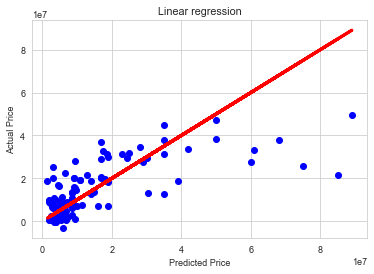

In [41]:

plt.scatter(Y_test,predictions, color = 'b')
plt.plot(Y_test,Y_test, linewidth = '3', color = 'r')
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.title('Linear regression')
plt.show()


In [42]:
xpredictions = xgb.predict(X_test)

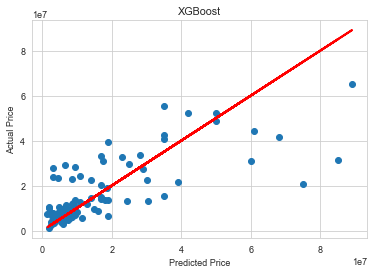

In [43]:

plt.scatter(Y_test,xpredictions)
plt.plot(Y_test,Y_test, linewidth = '2', color = 'r')
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.title('XGBoost')
plt.show()


In [44]:
MAE1 =  mean_absolute_error(Y_test, predictions)
MAE2 =  mean_absolute_error(Y_test, xpredictions)

In [45]:
print('MAE of Linear regression ', MAE1)
print('MAE of XGBoost ',MAE2)

MAE of Linear regression  7975345.509927108
MAE of XGBoost  6905706.085280374


In [46]:
MSE1 = mean_squared_error(Y_test, predictions)
MSE2 = mean_squared_error(Y_test, xpredictions)


In [47]:
print('MSE of Linear regression ', MSE1)
print('MSE of XGBoost ',MSE2)

MSE of Linear regression  161659736441648.06
MSE of XGBoost  136738576231494.48


In [48]:
RMSE1 = np.sqrt(MSE1)
RMSE2 = np.sqrt(MSE2)

In [49]:
print('RMSE of Linear regression ', RMSE1)
print('RMSE of XGBoost ',RMSE2)

RMSE of Linear regression  12714548.220115729
RMSE of XGBoost  11693527.108254997


In [50]:
dataset = pd.read_excel("Cdataset_bangkok.xlsx")
X, y = dataset.iloc[:, :-1], dataset.iloc[:, -1]

C:\Users\Teerakom\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


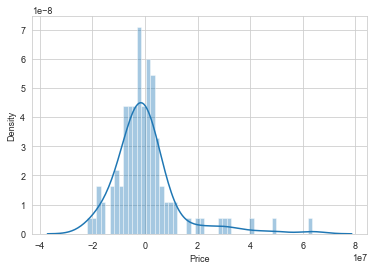

In [51]:
sns.distplot((Y_test-predictions),bins=50);

C:\Users\Teerakom\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


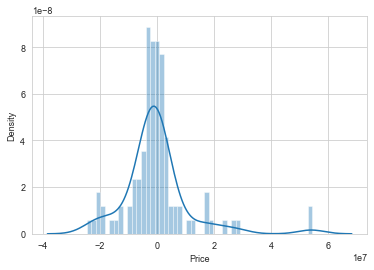

In [52]:
sns.distplot((Y_test-xpredictions),bins=50);

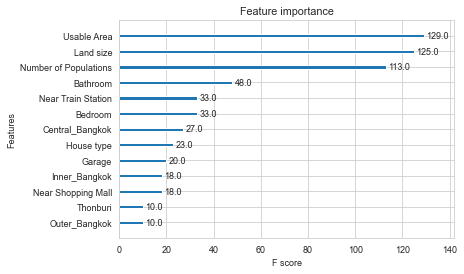

In [53]:
plot_importance(xgb)
plt.show()

In [54]:
coeff_df = pd.DataFrame(lr.coef_ , X_train.columns , columns=['Coefficient'])
coeff_df

,Coefficient
Land size,4.305711e+04
Usable Area,3.288512e+04
Bedroom,-2.962861e+06
Bathroom,2.775938e+06
Garage,6.398639e+06
Near Shopping Mall,2.724518e+06
Near Train Station,4.272899e+06
House type,1.036436e+07
Number of Populations,-1.304656e+01
Central_Bangkok,1.248561e+07


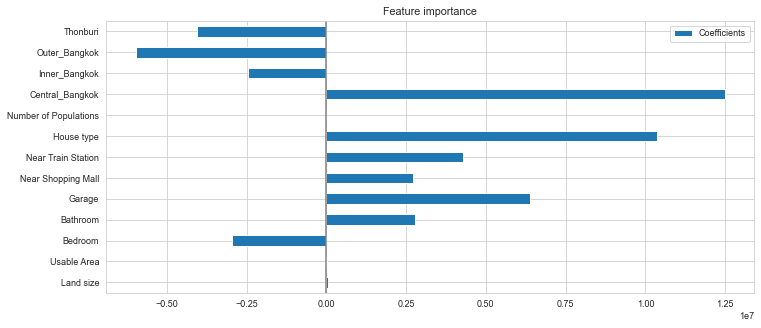

In [55]:
coefs = pd.DataFrame(
   lr.coef_,
   columns=['Coefficients'], index=X_train.columns
)

coefs.plot(kind='barh', figsize=(15, 5))
plt.title('Feature importance')
plt.axvline(x=0, color='.5')
plt.subplots_adjust(left=.3)

In [38]:
predictions=pd.DataFrame(predictions,columns=['Price Predict'])
Y_test.reset_index(drop=True,inplace=True)
y_test_y_head=pd.concat([Y_test,predictions],axis=1)
y_test_y_head.head()

,Price,Price Predict
0,6300000,8.007312e+06
1,25000000,1.927823e+07
2,8700000,1.268379e+07
3,59900000,4.000255e+07
4,4490000,6.285720e+06


In [39]:
xpredictions=pd.DataFrame(xpredictions,columns=['Price Predict'])
Y_test.reset_index(drop=True,inplace=True)
y_test_y_head=pd.concat([Y_test,xpredictions],axis=1)
y_test_y_head.head()

,Price,Price Predict
0,6300000,5331059.0
1,25000000,22382510.0
2,8700000,11684432.0
3,59900000,36926072.0
4,4490000,6291196.0
